In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pyecharts import Pie
import missingno as msno
from sklearn import metrics as mt

from attr import *
from plot_comfusion_matrix import *

## 导入数据

In [2]:
data = pd.read_excel('data_cn.xlsx')
data.loc[data.label ==2,'label'] = 0
data.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,guarantors,...,Property,Age,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,label
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


## 数据转换为数值

In [3]:
data_tranfer = data.copy()
for column, map_value in maping.items():
    data_tranfer[column] = data[column].map(map_value)
data_tranfer.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,guarantors,...,Property,Age,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,label
0,100,6,0,A43,1169,1,10,4,A93,0,...,4,67,A143,2,2,3,1,1,1,1
1,200,48,2,A43,5951,100,4,2,A92,0,...,4,22,A143,2,1,3,1,0,1,0
2,0,12,0,A46,2096,100,7,2,A93,0,...,4,49,A143,2,1,2,2,0,1,1
3,100,42,2,A42,7882,100,7,2,A93,2,...,3,45,A143,0,1,3,2,0,1,1
4,100,24,1,A40,4870,100,4,3,A93,0,...,1,53,A143,0,2,3,2,0,1,0


In [4]:
index_of_unorder = [i for i, column in enumerate(data_tranfer.columns) if data_tranfer[column].dtype == 'object']

In [5]:
for column in data_tranfer.select_dtypes(include=['object']).columns:
    data_tranfer[column] = np.unique(data_tranfer[column], return_inverse=True)[1]
data_tranfer.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,guarantors,...,Property,Age,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,foreign_worker,label
0,100,6,0,4,1169,1,10,4,2,0,...,4,67,2,2,2,3,1,1,1,1
1,200,48,2,4,5951,100,4,2,1,0,...,4,22,2,2,1,3,1,0,1,0
2,0,12,0,7,2096,100,7,2,2,0,...,4,49,2,2,1,2,2,0,1,1
3,100,42,2,3,7882,100,7,2,2,2,...,3,45,2,0,1,3,2,0,1,1
4,100,24,1,0,4870,100,4,3,2,0,...,1,53,2,0,2,3,2,0,1,0


## 数据划分

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_tranfer.drop('label',axis=1).values, data_tranfer['label'].values)

### one-hot

In [7]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(categorical_features=index_of_unorder)
X_train = onehot.fit_transform(X_train, y_train)

### z-score 规范化

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False) # 初始化缩放器
X_train_scale = sc.fit_transform(X_train, y_train).toarray()

## 递归特征消除 (Recursive Feature Elimination)

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# 建立逻辑回归分类器
model = LogisticRegression()
# 建立递归特征消除筛选器
rfe = RFE(model, 10) #通过递归选择特征，选择10个特征
X_train_rfe = rfe.fit_transform(X_train_scale, y_train)

## 相关性分析

In [18]:
#colormap = plt.cm.viridis
#plt.figure(figsize=(12,12))
#plt.title('Pearson Correlation of Features', y=1.05, size=15)
#sns.heatmap(np.corrcoef(X_train_rfe),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Embedded

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123)#构建分类随机森林分类器
clf.fit(X_train_rfe, y_train) #对自变量和因变量进行拟合
clf.base_estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 过采样

In [12]:
from imblearn.over_sampling import SMOTE # 导入SMOTE算法模块
# 处理不平衡数据
sm = SMOTE(random_state=42)    # 处理过采样的方法
X_resample, y_resample = sm.fit_sample(X_train_rfe, y_train)

In [13]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression() # 构建逻辑回归分类器
clf1.fit(X_resample, y_resample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
predicted1 = clf.predict(X_resample) # 通过分类器产生预测结果

In [16]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_resample, predicted1) 
m

array([[437,  90],
       [ 21, 506]], dtype=int64)

In [17]:
from sklearn.metrics import roc_auc_score
roc_auc1 = roc_auc_score(y_resample, predicted1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.894687


In [19]:
X_test_transfer = onehot.transform(X_test)
X_test_transfer = sc.transform(X_test_transfer)
X_test_transfer = rfe.transform(X_test_transfer)

In [20]:
from sklearn.metrics import roc_auc_score
y_predict = clf.predict(X_test_transfer)
roc_auc2 = roc_auc_score(y_test, y_predict)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.575557


In [25]:
mt.accuracy_score(y_test, y_predict)

0.63200000000000001

## cross-validation+grid search

### 数据划分

## 使用最邻近算法

### 网格搜索

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from plot_comfusion_matrix import *

In [29]:
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # random_state = 0 每次切分的数据都一样

In [27]:
X_train = X_resample
y_train = y_resample
X_test = X_test_transfer 

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
k_range = list(range(1,20))
weight_options = ['uniform', 'distance']
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

param_knn = dict(n_neighbors=k_range, weights=weight_options, algorithm=algorithm)
#rand_knn = GridSearchCV(knn, param_knn, cv=10, scoring='accuracy')
rand_knn = RandomizedSearchCV(knn, param_knn, cv=10, scoring='accuracy',n_iter=10, random_state=5)
rand_knn.fit(X_train, y_train)
print("knn_best:%f" %rand_knn.best_score_)

knn_best:0.776091


In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_knn_pred = rand_knn.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

accuracy: 0.6
             precision    recall  f1-score   support

          0       0.37      0.44      0.40        77
          1       0.73      0.67      0.70       173

avg / total       0.62      0.60      0.61       250



In [32]:
roc_auc1 = roc_auc_score(y_test, y_knn_pred)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.556039


Normalized confusion matrix
[[ 0.44155844  0.55844156]
 [ 0.32947977  0.67052023]]


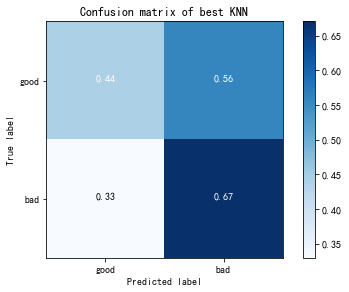

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_knn_pred)    
classs = ['good', 'bad']
plot_confusion_matrix(cm, classes=classs,normalize=True, title='Confusion matrix of best KNN')